# **Aviation Risk Analysis**

## **1. Business Understanding**

### 1.1 Business Overview
The company is exploring entry into the aviation industry by purchasing and operating aircraft for commercial and private use. Aviation activities come with safety and financial risks, making risk assessment a critical part of the decision-making process.The objective of this analysis is to evaluate historical aviation accident data to identify aircraft types and operating conditions associated with lower accident severity.The insights from this analysis will help guide safer aircraft investment decisions.



### 1.2 Problem Statement
Given the widespread adoption of air travel as a primary mode of transportation, this analysis makes use of historical and recent aircraft accident data to help an investor identify low-risk opportunities in the aircraft industry, particularly by assessing safety performance across different airline models and makes, and identify how each aircraft is affected by factors such as weather conditions leading to accidents.


### 1.3 Business Objective

#### 1.3.1 Main Objective 

The main objective of this project is to analyse which aircrafts offer lower risks to investors.

#### 1.3.2 Specific Objectives

The specific objectives of the project are:

1. Find the aircrafts that are commony used for transport by the passengers.

2. Find the common reason for travel

3. Find the weather conditions that commonly leads to accidents

4. Show the trend of the accidents rates overtime

#### 1.3.3 Research Questions

1. Which aircraft manufacturers and models are linked to lower fatality rates?

2. Which aircrafts are commonly used by passengers?

3. Which weather conditions lead to accidents?

4. How have aviation accident patterns  changed over time?



 


## **2. Data Understanding**

The dataset is sourced from the National Transportation Safety Board (NTSB) and contains records of aviation accidents 
and incidents from 1948 to 2023.

It includes information on:
- Aircraft make and model
- Injury severity (fatal, serious, minor, uninjured)
- Phase of flight
- Purpose of flight
- Weather conditions
- Event dates and locations

This dataset allows us to evaluate operational risk by analyzing accident outcomes across aircraft types and flight conditions.

The aim is to understand the structure and content of the dataset. This involves reviewing the available features, checking their data types and identifying potential issues such as missing values or inconsistencies.

In [5]:
#Importing required Libraries and Loading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("AviationData.csv", encoding='latin1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
## Dataset Overview
df.shape

(88889, 31)

The dataset contains  88889 rows and 31 columns.

In [9]:
## Data Structure and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

* The data contains missing values

* The columns are of either object or float data type

In [12]:
## Statistical Summary
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
#create a boolean output 
df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


Rows that contain True indicate that there is missing values in that column.


In [15]:
## Missing Values Count per Column
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

The only columns that don't contain missing values are Event.Id,Investigation.Type, Accident.Number and Event.Date

The column with the most missing values is schedule. From this we can observe that there is a high number of missing values in this dataset

In [18]:
## Dataset Columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### **3. Data Preparation**

To prepare the data for analysis:
1. Irrelevant columns were removed and the dataset was reduced to variables directly related to operational risk.
2. Missing injury counts were replaced with zero, since missing values indicate no recorded injuries rather than unknown outcomes.
3. Rows missing critical categorical variables such as aircraft make and phase of flight were removed.
4. A year variable was also created from the event date to allow trend analysis over time.

In [21]:
## Selecting Relevant Columns for Risk Analysis
relevant_columns = ['Aircraft.damage', 'Make', 'Model', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Purpose.of.flight', 'Event.Date', 'Broad.phase.of.flight','Injury.Severity' ]
df_clean = df[relevant_columns].copy()
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [22]:
df_clean.shape

(88889, 12)

In [23]:
#checking missing values
df_clean.isnull().sum()

Aircraft.damage            3194
Make                         63
Model                        92
Total.Fatal.Injuries      11401
Total.Minor.Injuries      11933
Total.Serious.Injuries    12510
Total.Uninjured            5912
Weather.Condition          4492
Purpose.of.flight          6192
Event.Date                    0
Broad.phase.of.flight     27165
Injury.Severity            1000
dtype: int64

Now I am going to fill in the null values

For categorical data we are going to replace with mode

### 3.1.1 Removing missing values in categorical data

I will first fill in the missing values for categorical data with a high number of missing values with mode i.e Purpose.of.flight, Injury severity, accident damage,and Broad.phase of flight with mode.

In [28]:
#filling missing values for Purpose of flight
#I used inplace=True to make sure the changes occur in the dataset
df_clean["Purpose.of.flight"].fillna(df_clean["Purpose.of.flight"].mode()[0],inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [29]:
df_clean["Aircraft.damage"].fillna(df_clean["Aircraft.damage"].mode()[0],inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [30]:
df_clean["Injury.Severity"].fillna(df_clean["Injury.Severity"].mode()[0],inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [31]:
df_clean["Broad.phase.of.flight"].fillna(df_clean["Broad.phase.of.flight"].mode()[0],inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


I can now drop rows from make and model since they've a low number of missing values.

In [33]:
df_clean=df_clean.dropna(subset=["Make"])
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [34]:
df_clean=df_clean.dropna(subset=["Model"])
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [35]:
#dropping rows in weather condition
df_clean=df_clean.dropna(subset=["Weather.Condition"])
df_clean

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)
...,...,...,...,...,...,...,...,...,...,...,...,...
88859,Substantial,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,0.0,0.0,0.0,1.0,VMC,Personal,2022-12-09,Landing,Non-Fatal
88865,Substantial,CESSNA,172,0.0,0.0,0.0,1.0,VMC,Instructional,2022-12-12,Landing,Non-Fatal
88873,Substantial,CIRRUS DESIGN CORP,SR22,0.0,0.0,0.0,1.0,VMC,Personal,2022-12-14,Landing,Non-Fatal
88877,Substantial,CESSNA,R172K,0.0,0.0,1.0,0.0,VMC,Personal,2022-12-16,Landing,Minor


In [36]:
#checking whether there is missing values in categorical data
df_clean.isnull().sum()

Aircraft.damage               0
Make                          0
Model                         0
Total.Fatal.Injuries      11081
Total.Minor.Injuries      11462
Total.Serious.Injuries    12061
Total.Uninjured            5570
Weather.Condition             0
Purpose.of.flight             0
Event.Date                    0
Broad.phase.of.flight         0
Injury.Severity               0
dtype: int64

* There are no missing values

In [38]:
df_clean['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other'],
      dtype=object)

### 3.1.2 Removing missing values in Numeric data

In this section I will fill in the missing values using median

In [41]:
df_clean["Total.Fatal.Injuries"].value_counts()

Total.Fatal.Injuries
0.0      56985
1.0       8280
2.0       4757
3.0       1427
4.0        967
         ...  
110.0        1
230.0        1
125.0        1
35.0         1
90.0         1
Name: count, Length: 95, dtype: int64

* I am using median to fill in the missing values to avoid biasness since the number of zero fatal injuries is considerably higher.

In [43]:
df_clean["Total.Fatal.Injuries"].fillna(df_clean["Total.Fatal.Injuries"].median(), inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [44]:
df_clean["Total.Serious.Injuries"].value_counts()

Total.Serious.Injuries
0.0      59591
1.0       8917
2.0       2732
3.0        590
4.0        242
5.0         67
6.0         29
7.0         26
9.0         12
10.0        10
8.0          7
13.0         7
26.0         4
11.0         4
28.0         3
59.0         2
25.0         2
12.0         2
21.0         2
14.0         2
17.0         2
106.0        1
55.0         1
125.0        1
20.0         1
27.0         1
19.0         1
137.0        1
35.0         1
33.0         1
41.0         1
88.0         1
63.0         1
23.0         1
60.0         1
15.0         1
47.0         1
39.0         1
45.0         1
18.0         1
44.0         1
50.0         1
81.0         1
16.0         1
22.0         1
Name: count, dtype: int64

In [45]:
#fill missing values for Total.Serious injuries with median to avoid biasness
df_clean["Total.Serious.Injuries"].fillna(df_clean["Total.Serious.Injuries"].median(), inplace =True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,NaN,0.0,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,NaN,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [46]:
df_clean["Total.Minor.Injuries"].fillna(df_clean["Total.Minor.Injuries"].median(),inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,0.0,0.0,NaN,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [47]:
df_clean["Total.Uninjured"].fillna(df_clean["Total.Uninjured"].median(),inplace=True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2)
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4)
2,Destroyed,Cessna,172M,3.0,0.0,0.0,1.0,IMC,Personal,1974-08-30,Cruise,Fatal(3)
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2)
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1)


In [48]:
#check whether they're any missing values
df_clean.isnull().sum()

Aircraft.damage           0
Make                      0
Model                     0
Total.Fatal.Injuries      0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Uninjured           0
Weather.Condition         0
Purpose.of.flight         0
Event.Date                0
Broad.phase.of.flight     0
Injury.Severity           0
dtype: int64

* The dataset contains no missing values

### 3.1.3 Feature engineering

In this section I am going to create the year column from the Even date column.

In [52]:
## Creating Year Column
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')
df_clean['Year'] = df_clean['Event.Date'].dt.year

In [53]:
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity,Year
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2),1948
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4),1962
2,Destroyed,Cessna,172M,3.0,0.0,0.0,1.0,IMC,Personal,1974-08-30,Cruise,Fatal(3),1974
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2),1977
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1),1979


In [54]:
df_clean.shape

(84338, 13)

* Our dataset has now an additional column year

### 3.1.4 Removing Unknowns and Creating Uniformity

In [57]:
df_clean["Purpose.of.flight"].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

Columns purpose of flight and weather condition contain Unknowns

In [59]:
df_clean["Purpose.of.flight"].mode()

0    Personal
Name: Purpose.of.flight, dtype: object

In [60]:
#replacing unknowns in Purpose.of.flight with mode
df_clean["Purpose.of.flight"]=df_clean["Purpose.of.flight"].str.replace("Unknown","Personal")
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity,Year
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2),1948
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4),1962
2,Destroyed,Cessna,172M,3.0,0.0,0.0,1.0,IMC,Personal,1974-08-30,Cruise,Fatal(3),1974
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2),1977
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1),1979


In [61]:
df_clean['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unk'], dtype=object)

* The weather condition column contains unknowns which are represents by 'Unk'

In [63]:
df_clean['Weather.Condition'].mode()

0    VMC
Name: Weather.Condition, dtype: object

In [64]:
#replacing unknowns in Weather Condition with mode
df_clean["Weather.Condition"]=df_clean["Weather.Condition"].str.replace("Unk","VMC")
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity,Year
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2),1948
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4),1962
2,Destroyed,Cessna,172M,3.0,0.0,0.0,1.0,IMC,Personal,1974-08-30,Cruise,Fatal(3),1974
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2),1977
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1),1979


In [65]:
df_clean['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [66]:
#details in column make are in different cases.
df_clean["Make"]=df_clean["Make"].str.title()
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity,Year
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2),1948
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4),1962
2,Destroyed,Cessna,172M,3.0,0.0,0.0,1.0,IMC,Personal,1974-08-30,Cruise,Fatal(3),1974
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2),1977
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1),1979


* This applies Title Case to every aircraft make to maintain uniformity, ensuring that identical manufacturers written in different cases (e.g., 'CESSNA', 'Cessna', 'cessna') are not counted as separate type.

In [68]:
#check for  duplicates 
df_clean.duplicated().any()

True

* There are duplicates present in the dataset

In [70]:
df_clean.drop_duplicates(subset=['Aircraft.damage', 'Make', 'Model', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Purpose.of.flight', 'Event.Date', 'Broad.phase.of.flight','Injury.Severity' ],keep="first",inplace= True)
df_clean.head()

,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured,Weather.Condition,Purpose.of.flight,Event.Date,Broad.phase.of.flight,Injury.Severity,Year
0,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Personal,1948-10-24,Cruise,Fatal(2),1948
1,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Personal,1962-07-19,Unknown,Fatal(4),1962
2,Destroyed,Cessna,172M,3.0,0.0,0.0,1.0,IMC,Personal,1974-08-30,Cruise,Fatal(3),1974
3,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Personal,1977-06-19,Cruise,Fatal(2),1977
4,Destroyed,Cessna,501,1.0,0.0,2.0,0.0,VMC,Personal,1979-08-02,Approach,Fatal(1),1979


In [71]:
#check if duplicates have been removed
df_clean.duplicated().any()

False

* All duplicates have been removed.

## **4. Data Analysis and Visualization**

This section investigates the dataset to get insights, evaluate feature distributions, assess relationships and detect issues or outliers.

First I will show the most commonly used types of aircrafts

#### 4.1 Aircraft Makes distribution

In this section I am trying to identify the most common makes of aircraft.

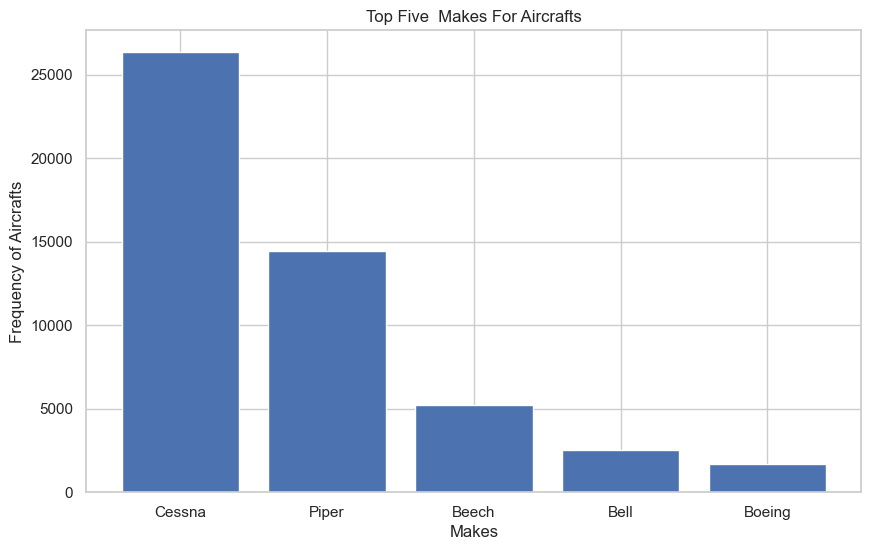

In [78]:
fig, ax =plt.subplots(figsize=(10,6))
x=list(df_clean["Make"].value_counts().index[:5])
y=list(df_clean["Make"].value_counts().values[:5])
ax.bar(x,y)
ax.set_title("Top Five  Makes For Aircrafts")
ax.set_xlabel("Makes")
ax.set_ylabel("Frequency of Aircrafts");

In [79]:
df_clean['Make'].value_counts().head(10)

Make
Cessna      26338
Piper       14457
Beech        5194
Bell         2526
Boeing       1680
Mooney       1298
Grumman      1156
Bellanca     1041
Robinson     1020
Hughes        907
Name: count, dtype: int64

## Observation
* Most commonly used type of aircraft is Cessna with 26,338 Cessna airplanes used for travel over the years.

#### 4.2.2 Total Fatal Injuries distribution

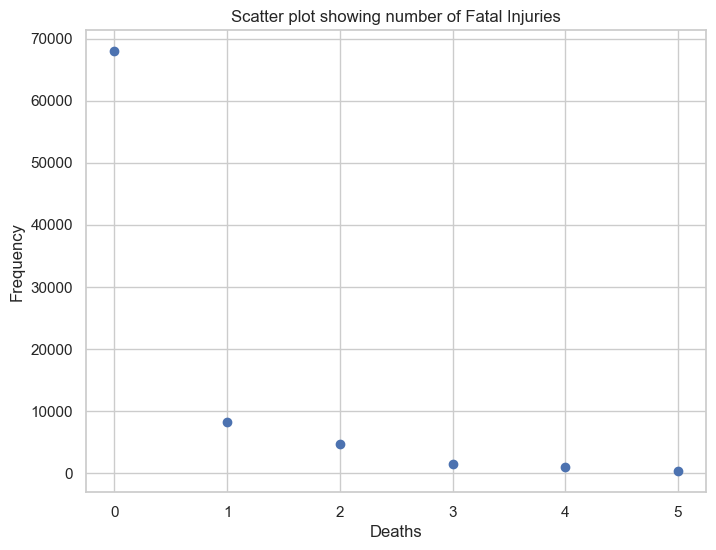

In [82]:
fig, ax =plt.subplots(figsize=(8,6))
x=list(df_clean["Total.Fatal.Injuries"].value_counts().index[:6])
y=list(df_clean["Total.Fatal.Injuries"].value_counts().values[:6])
ax.scatter(x,y)
ax.set_title("Scatter plot showing number of Fatal Injuries")
ax.set_xlabel("Deaths")
ax.set_ylabel("Frequency");

#### Observation
* The above scatter plot shows us that there is a huge number of survivors from the accidents with almost 70,000 passengers surviving the crash.
* The number of 1 and 2 deaths is still huge with roughly 10,000 passengers dying.

#### 4.2.3 Make by Total Fatal, serious and Minor injuries

In this section, I provide a detailed analysis of the aircraft makes associated with the highest numbers of fatalities and injuries.

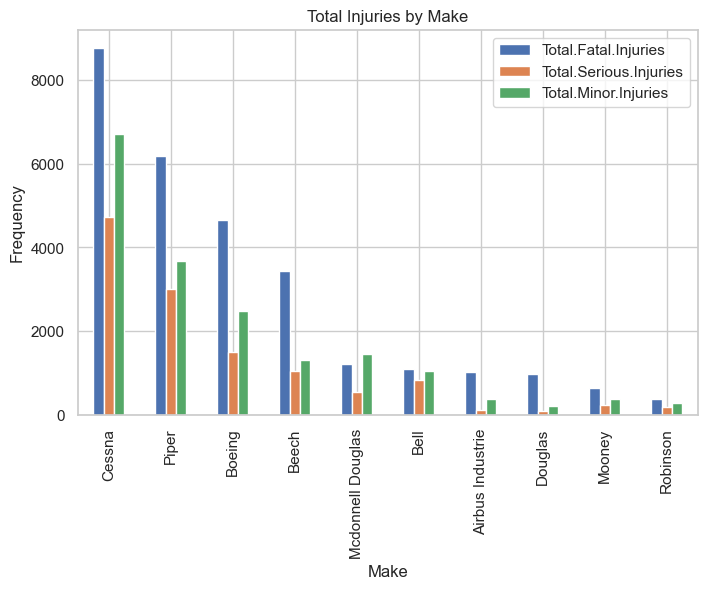

In [85]:
#slicing make with all the injuries
df_clean.groupby(["Make"])[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum().sort_values(by='Total.Fatal.Injuries',ascending=False).head(10).plot(kind = "bar",figsize = (8,5))
plt.title("Total Injuries by Make")
plt.xlabel("Make")
plt.ylabel("Frequency");

#### Observation
* The bar chart shows the aircraft with the highest amount of fatal, minor and serious injuries is Cessna.The number of Fatal deaths in Cessna is over 8000.
* The aircrafts with the highest number of fatalities is Cessna, piper, Boeing and Beech

#### 4.2.4 Make by Total Uninjured

In this section I am trying to show which aircrafts are safer for passengers to travel in. This steps allows us to observe which aircraft make is reliable to our consumers and investors.

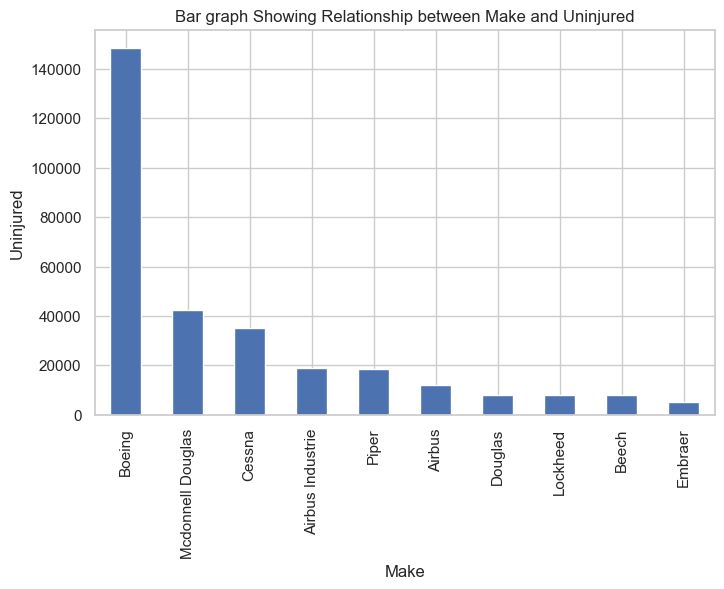

In [89]:
#slicing make and the Total Uninjured.
df_clean.groupby(["Make"])["Total.Uninjured"].sum().sort_values(ascending=False).head(10).plot(kind="bar",figsize=(8,5))
plt.title("Bar graph Showing Relationship between Make and Uninjured")
plt.xlabel("Make")
plt.ylabel("Uninjured");

#### Observation
* The boeing aircraft is the safer aircraft with over 140,000 uninjured passengers, indicating that aircraft can withstand accidents.


### 4.2.5 Purpose of flight distribution

In this section I am going to look at the most common reason for travel. This helps us identify with types of flights to invest in either personal, commercial or business.

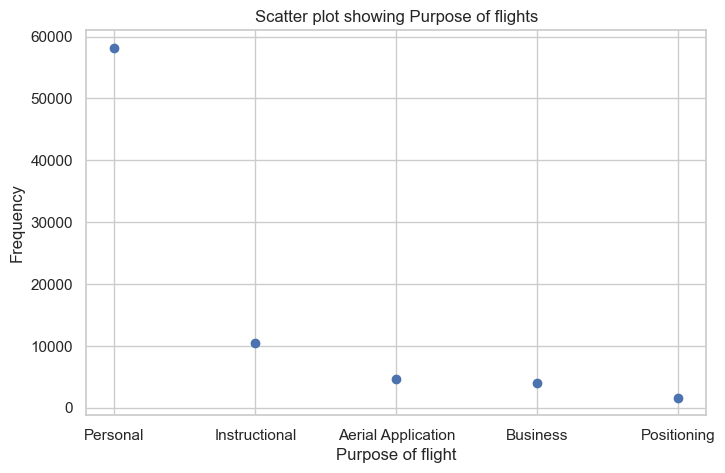

In [93]:
fig, ax =plt.subplots(figsize=(8,5))
x=list(df_clean["Purpose.of.flight"].value_counts().index[:5])
y=list(df_clean["Purpose.of.flight"].value_counts().values[:5])
ax.scatter(x,y)
ax.set_title("Scatter plot showing Purpose of flights")
ax.set_xlabel("Purpose of flight")
ax.set_ylabel("Frequency");

#### Observation
* The visualization shows that most flights are personal so the shareholders should invest more in personal flights.
* The shareholders can also invest in flights dealing with Instructional,Aerial Application and Business just as a way to diversify since they're also a common reason for using aircrafts.

### 4.2.6 Purpose of flight by injuries 

In this section I am trying to find which flights are more prone to accidents.

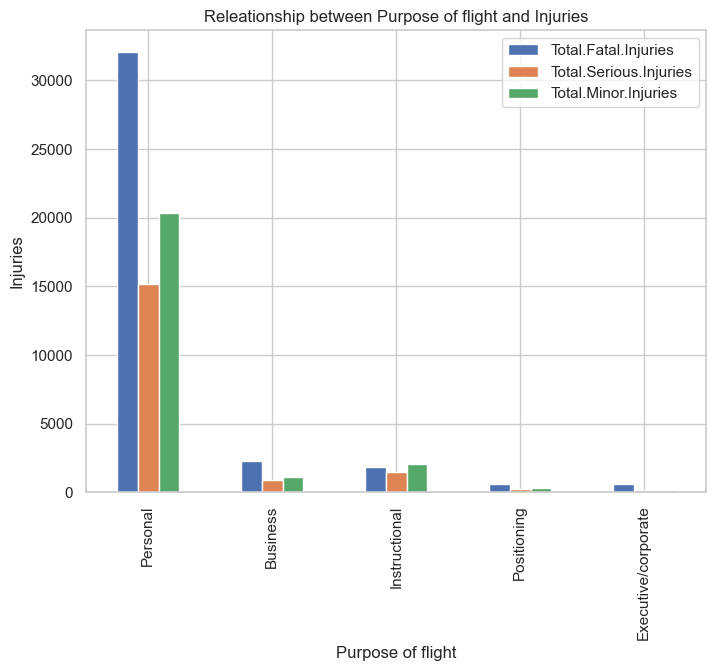

In [97]:
df_clean.groupby(["Purpose.of.flight"])[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum().sort_values(by='Total.Fatal.Injuries',ascending=False).head(5).plot(kind = "bar",figsize = (8,6))
plt.title("Releationship between Purpose of flight and Injuries")
plt.xlabel("Purpose of flight")
plt.ylabel("Injuries");

#### Observation
* The analysis shows that most of the fatal injuries occur during personal flights, which over 3000 fatal injuries. This makes sense being that Personal flights are the most common reason for travel hence would've the most fatal injuries.

### 4.2.7 Weather Condition distribution

This sections shows the different weather conditions which include:
* VMC(Visual Meteorological Conditions)- it means the weather is clear enough (good visibility, sufficient cloud clearance) for pilots to fly by sight under Visual Flight Rules (VFR), allowing them to see and avoid  terrain, obstacles, and other aircraft without relying solely on instruments.
  
* IMC(Instrument Meteorological Conditions)- it means weather conditions where visibility is poor (like fog, clouds, or heavy precipitation) to the point that a pilot cannot see the ground, horizon, or other aircraft, forcing them to rely solely on instruments to fly.

* UNK- is used when the exact weather conditions are not known indicating some information is missing.

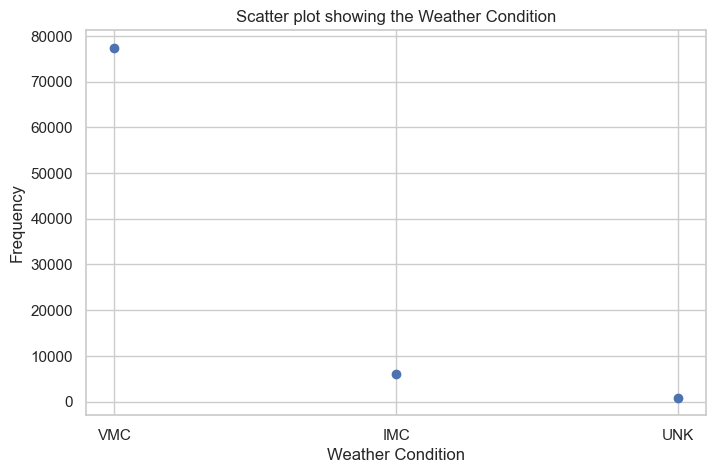

In [101]:
fig, ax =plt.subplots(figsize=(8,5))
x=list(df_clean["Weather.Condition"].value_counts().index[:10])
y=list(df_clean["Weather.Condition"].value_counts().values[:10])
ax.scatter(x,y)
ax.set_title("Scatter plot showing the Weather Condition")
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Frequency");

In [102]:
df_clean['Weather.Condition'].value_counts()

Weather.Condition
VMC    77402
IMC     5969
UNK      853
Name: count, dtype: int64

#### Observation
* VMC is the most common type of weather condition with 77402 instances of clear weather
* VMC and IMC are external weather conditions during your flight where:
    * VMC are weather conditions in which pilots have sufficient visibility to fly aircraft relying on visual references.
    * IMC are weather conditions where the visilbilty has dropped down due to fog or flying through a crowd hence we make use of flight instrunments.

#### 4.2.8 Weather condition by Injuries

In this section I am going to evaluate which weather conditions have led to fatalities and injuries. My analysis will show when accidents are more prevalent depending on the type of weather

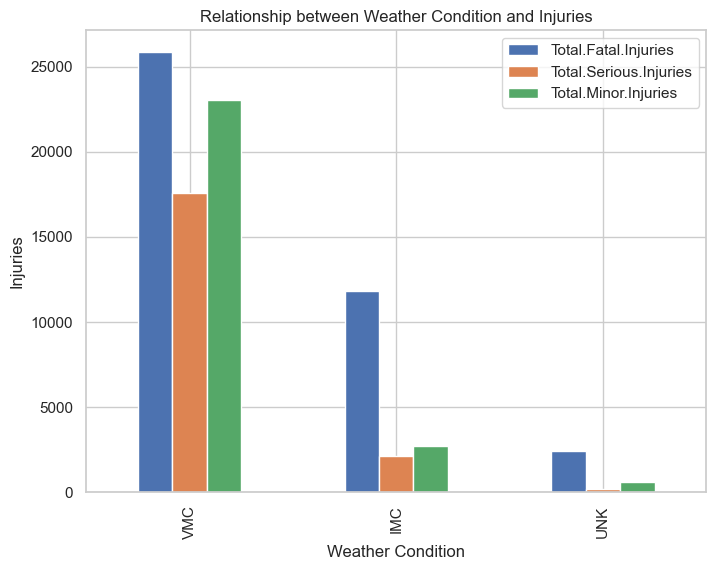

In [106]:
#slicing weather condition
df_clean.groupby(["Weather.Condition"])[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum().sort_values(by='Total.Fatal.Injuries',ascending=False).head(15).plot(kind="bar",figsize=(8,6))
plt.title("Relationship between Weather Condition and Injuries")
plt.xlabel("Weather Condition")
plt.ylabel("Injuries");

#### Observation
* The Bargraph shows most of the injuries occur when there is visibility since VMC has a higher number of Total fatal, serious, and minor injuries than IMC.
* The number of fatal injuries caused by VMC is over 25,000 which concludes that majority of the accidents are due to human error rather than the weather ie fog,mist and a cloudy day.
* The number of fatal injuries caused by IMC is  over 10,000 with  a few minor and serious injuries.

#### 4.2.9 Make and Weather Condition by Fatalities

In this section, I will examine which aircraft makes exhibit higher susceptibility to accidents under different weather conditions during travel. This analysis highlights variations in aircraft reliability during adverse weather. A reliable aircraft should demonstrate robust performance across weather types through features like certified icing protection, strong low-visibility handling, and resistance to turbulence-induced.

This step enables me to identify which aircraft manufacturers produce makes that cannot withstand natural elements like rain, fog, and mist, and therefore investors should avoid investing in those airplanes.

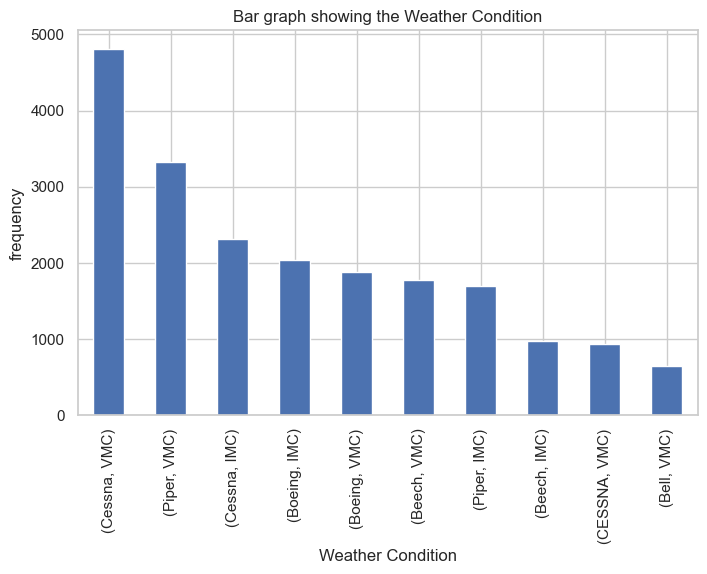

In [111]:
df.groupby(["Make","Weather.Condition"])["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(10).plot(kind="bar",figsize=(8,5))
plt.title("Bar graph showing the Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("frequency");

#### Observation
* The plane that is most affected by the natural elements and not human error is Cessna with over 2,000 fatalities caused by IMC weather condition.
* Boeing also has a high number of fatalities caused by IMC weather condition with 2000 fatalities.
* Beech aircraft make has about 1000 fatalities caused by IMC weather condition indicating that it can handle the IMC weather condition better than the rest of the aircrafts.

#### 4.2.10 Accidents over time

In this section, I provide a detailed analysis of the increases and decreases in aviation accidents over time. This analysis helps illustrate the overall trend in accident rates.

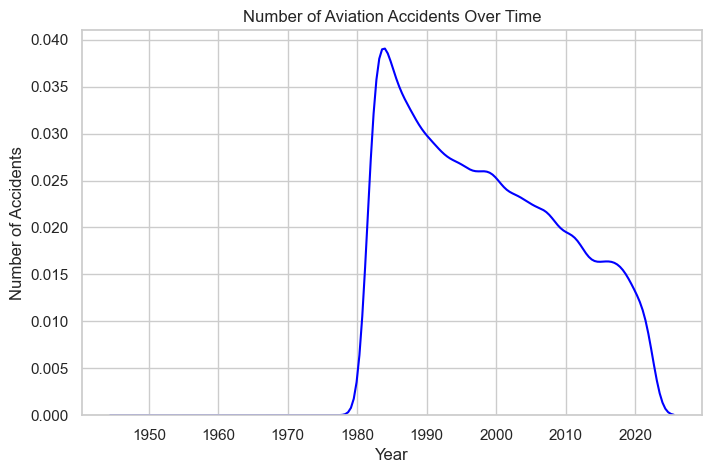

In [174]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_clean, x='Year', color='blue')
plt.title("Number of Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

#### Observation
* There was a huge increase in the number of accidents between 1980-1985.
* The number of aviation accidents has been steadily declining since 1985, indicating that aircraft are becoming increasingly robust and that air travel is growing safer over time.


## Conclusions and Recommendations

### Key Findings
1. The most common type of aircraft used for travel is Cessna.
2. The most common reason for travel is personal flights.
3. The weather condition mostly responsible for accidents or fatal injuries is VMC.
4. Most accidents are due to human error since IMC has less number of Total fatal and serious injuries compared to VMC

----

### Conclusion
Investors should explore opportunities in the aviation industry, given the steady decline in accident numbers over time. This trend reflects reduced overall losses in the sector, requiring less capital to address damages and liabilities.The analysis indicated that Cessna aircraft are linked to a notably higher number of fatal injuries compared to other aircraft makes. It also revealed that the vast majority of accidents stem from human error, emphasizing that most aircraft are inherently reliable and capable of safely transporting passengers. Furthermore, the analysis identified Boeing aircraft as the safest among those evaluated.

### Business Recommendations
1. Avoid investing in the Cessna aircraft since it has a higher number of fatal injuries compared to the rest of the aircraft makes.
2. The investor should invest in personal flights since there is a high growth in this sector which allow for high profit margins.
3. The investors should invest in the Boeing aircraft since it has a high number of Uninjured passengers indicating it's the safer aircraft model or make.
4. The investors should invest in an aircraft that can withstand harsh weather conditions hence I would recommend investing in the Boeing aircraft since it has a low number of fatalities caused by IMC and VMC weather conditions



In [118]:
df_clean.to_csv("aviation_tableau_data.csv", index=False)